In [47]:
import numpy as np
import matplotlib.pyplot as plt
import ambulance_game as abg

# Blocking times for 2 similar Hospitals via simulation

In [48]:
# System Parameters
lambda_a = 0.15
num_of_trials = 50
runtime = 1440
accuracy = 10
warm_up_time = 100
common_seed = 10

# Hospital 1 Parameters
lambda_o_1 = 0.08      # Others: 4.8 arrivals per hour
mu_1 = 0.05           # Service time: 1.8 services per hour
num_of_servers_1 = 6   # Number of servers: 6 servers
threshold_1 = 6
seed_num_1 = None

# Hospital 2 Parameters
lambda_o_2 = 0.08
mu_2 = 0.05
num_of_servers_2 = 6
threshold_2 = 6
seed_num_2 = None

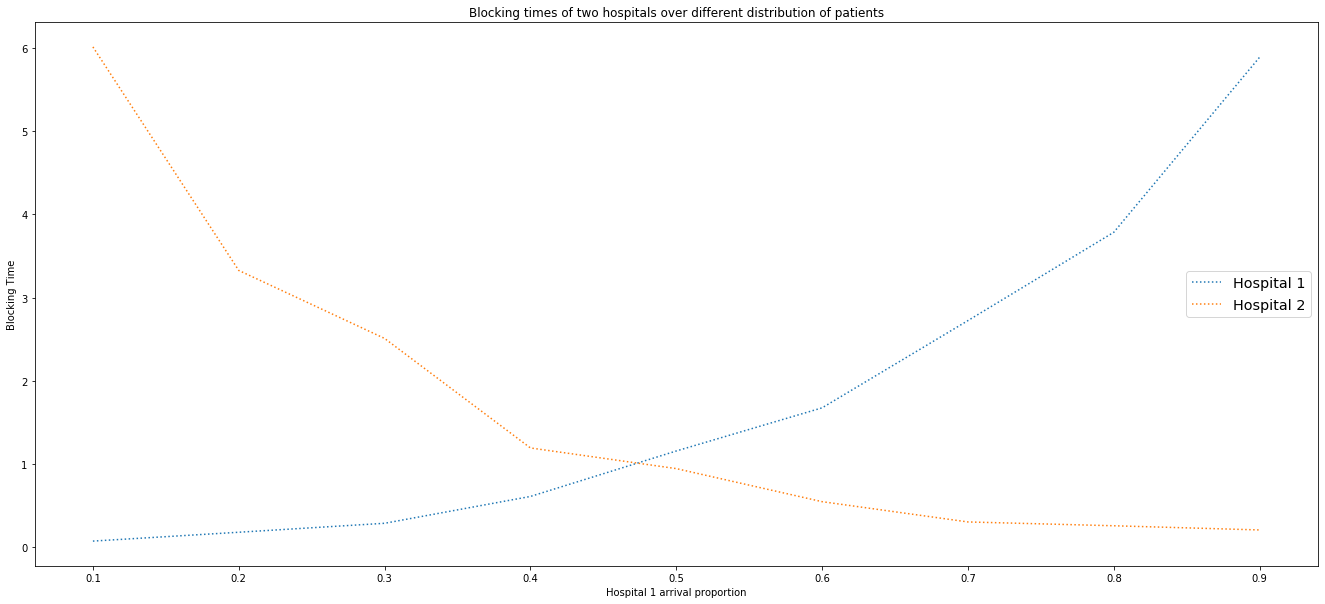

In [49]:
abg.make_plot_two_hospitals_arrival_split(lambda_a=lambda_a, lambda_o_1=lambda_o_1, lambda_o_2=lambda_o_2, mu_1=mu_1, mu_2=mu_2, num_of_servers_1=num_of_servers_1, num_of_servers_2=num_of_servers_2, threshold_1=threshold_1, threshold_2=threshold_2, measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

# Optimal Distribution of ambulance patients via simulation

### Identical simulations

In [35]:
p_1 = abg.simulation.calculate_optimal_ambulance_distribution(lambda_a=lambda_a, lambda_o_1=lambda_o_1, lambda_o_2=lambda_o_2, mu_1=mu_1, mu_2=mu_2, num_of_servers_1=num_of_servers_1, num_of_servers_2=num_of_servers_2, threshold_1=threshold_1, threshold_2=threshold_2, seed_num_1=common_seed, seed_num_2=common_seed, num_of_trials=1, warm_up_time=warm_up_time, runtime=runtime)
p_2 = 1 - p_1

In [37]:
print("Proportions")
print(p_1, p_2)

Proportions
0.5 0.5


### Similar simulations

In [39]:
num_of_trials = 50

In [38]:
p_1 = abg.simulation.calculate_optimal_ambulance_distribution(lambda_a=lambda_a, lambda_o_1=lambda_o_1, lambda_o_2=lambda_o_2, mu_1=mu_1, mu_2=mu_2, num_of_servers_1=num_of_servers_1, num_of_servers_2=num_of_servers_2, threshold_1=threshold_1, threshold_2=threshold_2, seed_num_1=seed_num_1, seed_num_2=seed_num_2, num_of_trials=num_of_trials, warm_up_time=warm_up_time, runtime=runtime)
p_2 = 1 - p_1

In [40]:
results_1 = abg.simulation.get_multiple_runs_results(lambda_a=p_1 * lambda_a, lambda_o=lambda_o_1, mu=mu_1, num_of_servers=num_of_servers_1, threshold=threshold_1, seed_num=seed_num_1, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type="tuple", runtime=runtime)
results_2 = abg.simulation.get_multiple_runs_results(lambda_a=p_2 * lambda_a, lambda_o=lambda_o_2, mu=mu_2, num_of_servers=num_of_servers_2, threshold=threshold_2, seed_num=seed_num_2, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type="tuple", runtime=runtime)
mean_blocking_1 = np.mean([np.nanmean(b.blocking_times) if len(b.blocking_times) != 0 else 0 for b in results_1])
mean_blocking_2 = np.mean([np.nanmean(b.blocking_times) if len(b.blocking_times) != 0 else 0 for b in results_2])

In [56]:
print("Proportions")
print(p_1, p_2)
print()
print("Mean Blocking times")
print(mean_blocking_1, mean_blocking_2)

Proportions
0.4826942047882188 0.5173057952117812

Mean Blocking times
1.174132810856384 0.9272415894134783
